<a href="https://colab.research.google.com/github/naman39910/Exploratory-Data-Analysis/blob/main/Copy_of_Numerical_Programming_in_Python_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [70]:
#Installing all necessary labraries
!pip install bs4
!pip install requests


In [71]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np


## **Scrapping Movies Data**

In [72]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)

## **Fetching Movie URL's**

In [73]:
# Find all div elements with class 'title-list-grid__item' which represent movie items in the webpage
movies_url_items = soup.find_all('div', class_='title-list-grid__item')

movies_url_list =[]

for elmnt in movies_url_items:

  # Extract the URL for each movie from the anchor tag's 'href' attribute
  url = elmnt.find("a")["href"]
  all_urls = "https://www.justwatch.com" + url

  movies_url_list.append(all_urls)
movies_url_list

['https://www.justwatch.com/in/movie/saiyaara',
 'https://www.justwatch.com/in/movie/housefull-5',
 'https://www.justwatch.com/in/movie/mon-potongo',
 'https://www.justwatch.com/in/movie/sitaare-zameen-par',
 'https://www.justwatch.com/in/movie/kubera-2025',
 'https://www.justwatch.com/in/movie/jurassic-world-4',
 'https://www.justwatch.com/in/movie/sister-midnight',
 'https://www.justwatch.com/in/movie/raid-2',
 'https://www.justwatch.com/in/movie/ballerina-2024',
 'https://www.justwatch.com/in/movie/thunderbolts',
 'https://www.justwatch.com/in/movie/heads-of-state',
 'https://www.justwatch.com/in/movie/365-days',
 'https://www.justwatch.com/in/movie/f1',
 'https://www.justwatch.com/in/movie/karate-kid-legends',
 'https://www.justwatch.com/in/movie/28-days-later',
 'https://www.justwatch.com/in/movie/rush-2013',
 'https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two',
 'https://www.justwatch.com/in/movie/nkr21',
 'https://www.justwatch.com/in/movie/how-to-hav

## **Scrapping Movie Title**

In [74]:
movies_title = []
for url in movies_url_list:

    # fetch the movie details by using fetch_movie_urls() function and passing the movies links(url) in parameter
    soup_d = fetch_movie_urls(url)

    # split the title by '(' and take [0] index
    title = soup_d.find('h1').text.split('(')[0].strip()

    movies_title.append(title)
movies_title


['Saiyaara',
 'Housefull 5',
 'Mon Potongo',
 'Sitaare Zameen Par',
 'Kuberaa',
 'Jurassic World: Rebirth',
 'Sister Midnight',
 'Raid 2',
 'Ballerina',
 'Thunderbolts*',
 'Heads of State',
 '365 Days',
 'F1 The Movie',
 'Karate Kid: Legends',
 '28 Days Later',
 'Rush',
 'Mission: Impossible - The Final Reckoning',
 'Arjun S/O Vyjayanthi',
 'How to Have Sex',
 'Final Destination Bloodlines',
 'Superman',
 'Eleven',
 'Robinhood',
 'Sinners',
 'The Old Guard 2',
 'Narivetta',
 'Aap Jaisa Koi',
 'How to Train Your Dragon',
 'Aashiqui 2',
 'Jaat',
 'Chhaava',
 'Mahavatar Narsimha',
 'Metro in Dino',
 'Thug Life',
 'Pushpa: The Rule - Part 2',
 'HIT: The Third Case',
 'Saunkan Saunkanay 2',
 'Maargan',
 'Senna',
 'Sardaarji 3',
 'Maa',
 'Kannappa',
 'Kesari Chapter 2: The Untold Story of Jallianwala Bagh',
 'Brick',
 'Companion',
 'Alappuzha Gymkhana',
 'Ford v Ferrari',
 'Materialists',
 'Bring Her Back',
 'Detective Ujjwalan',
 'Bubblegum',
 'The Amateur',
 'Madrid, 1987',
 'Bou Buttu Bhu

## **Scrapping release Year**

In [75]:
# getting list of movies year
movies_year = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    year = soup_d.find('span', class_='release-year').text.strip("( )")
    movies_year.append(year)
movies_year

['2025',
 '2025',
 '2024',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2020',
 '2025',
 '2025',
 '2002',
 '2013',
 '2025',
 '2025',
 '2023',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2013',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2024',
 '2025',
 '2025',
 '2025',
 '2010',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2019',
 '2025',
 '2025',
 '2025',
 '2023',
 '2025',
 '2012',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2025',
 '2023',
 '2025',
 '2025',
 '2025',
 '2025',
 '2018',
 '2022',
 '2016',
 '2017',
 '2025',
 '2023',
 '2025',
 '2015',
 '2018',
 '2013',
 '2025',
 '2025',
 '2025',
 '2025',
 '2024',
 '2025',
 '2018',
 '2021',
 '2025',
 '2025',
 '2025',
 '2003',
 '2013',
 '2020',
 '2019',
 '2022',
 '2016',
 '2007',
 '2025',
 '2014',
 '2025',
 '2010',
 '2003',
 '2001']

## **Scrapping Genres**

In [76]:
# Fetching movies genres list
movies_genre = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)

    # string='Genres' used because class_='detail-infos__subheading' is multiple and Genres was inside div tag so take find_next_sibling() function
    genre = soup_d.find('h3', class_='poster-detail-infos__subheading',string='Genres').find_next_sibling('div', class_='poster-detail-infos__value').text.strip().split(',')

    movies_genre.append(genre)
movies_genre


movies_genre

[['Romance', ' Drama', '\xa0Romantic Drama'],
 ['Comedy', ' Mystery & Thriller', ' Drama'],
 ['Drama', ' Romance', '\xa0Romantic Drama'],
 ['Comedy', ' Drama', ' Sport', '\xa0Bollywood', '\xa0Sports Drama'],
 ['Mystery & Thriller',
  ' Drama',
  ' Crime',
  ' Action & Adventure',
  '\xa0Action Thriller'],
 ['Action & Adventure',
  ' Science-Fiction',
  ' Mystery & Thriller',
  '\xa0Invasion'],
 ['Comedy', ' Drama', '\xa0Dramedy'],
 ['Drama', ' Mystery & Thriller', ' Crime', '\xa0Bollywood'],
 ['Mystery & Thriller',
  ' Crime',
  ' Action & Adventure',
  '\xa0Action Thriller'],
 ['Action & Adventure', ' Science-Fiction', ' Crime', ' Drama', ' Fantasy'],
 ['Comedy',
  ' Action & Adventure',
  ' Mystery & Thriller',
  '\xa0Action Thriller'],
 ['Drama',
  ' Romance',
  ' Made in Europe',
  '\xa0Romantic Thriller',
  '\xa0Romantic Drama'],
 ['Action & Adventure', ' Drama', ' Sport', '\xa0Sports Drama'],
 ['Sport', ' Action & Adventure', ' Drama', ' Kids & Family'],
 ['Drama', ' Horror', ' S

## **Scrapping IMBD Rating**

In [77]:
# Fetching IMDB rating
movies_rating = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    rating_element = soup_d.find('div', class_='jw-scoring-listing poster-details')
    if rating_element:
        rating = rating_element.text.split('(')[0].strip()
    else:
        rating = None

    # For Some movies IMDB rating not givin only rotten rommato is givin like (79%) so I replaced the rotten tammatos with None
    if rating and re.findall(r'%',rating):
        rating = None

    movies_rating.append(rating)
movies_rating

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '9.7',
 '7.6',
 None,
 None,
 None,
 None,
 None,
 None,
 '5.2',
 '6.2',
 '6.0',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '7.2',
 None,
 None,
 None,
 None,
 '7.2',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '7.3',
 None,
 None,
 '5.5']

## **Scrapping Runtime/Duration**

In [78]:
# Fetching list of Movies Runtime
movies_runtime = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    try:
        runtime = soup_d.find('h3', class_='poster-detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='poster-detail-infos__value').text.strip()
    except:
        runtime = 'NA'

    movies_runtime.append(runtime)
movies_runtime

['2h 36min',
 '2h 43min',
 '2h 29min',
 '2h 35min',
 '3h 5min',
 '2h 13min',
 '1h 47min',
 '2h 19min',
 '2h 5min',
 '2h 7min',
 '1h 53min',
 '1h 54min',
 '2h 36min',
 '1h 34min',
 '1h 53min',
 '2h 3min',
 '2h 50min',
 '2h 22min',
 '1h 31min',
 '1h 50min',
 '2h 10min',
 '2h 15min',
 '2h 30min',
 '2h 17min',
 '1h 47min',
 '2h 19min',
 '1h 55min',
 '2h 5min',
 '2h 12min',
 '2h 33min',
 '2h 41min',
 '2h 10min',
 '2h 42min',
 '2h 30min',
 '3h 21min',
 '2h 37min',
 '2h 22min',
 '2h 12min',
 '1h 46min',
 '2h 13min',
 '2h 13min',
 '3h 3min',
 '2h 15min',
 '1h 39min',
 '1h 37min',
 '2h 20min',
 '2h 33min',
 '1h 49min',
 '1h 44min',
 '2h 4min',
 '2h 26min',
 '2h 2min',
 '1h 44min',
 '2h 56min',
 '2h 4min',
 '2h 10min',
 '1h 35min',
 '2h 15min',
 '2h 37min',
 '2h 8min',
 '2h 20min',
 '1h 34min',
 '2h 18min',
 '1h 55min',
 '2h 1min',
 '2h 30min',
 '2h 0min',
 '2h 46min',
 '2h 41min',
 '1h 43min',
 '1h 50min',
 '2h 44min',
 '1h 43min',
 '2h 4min',
 '1h 28min',
 '2h 59min',
 '2h 35min',
 '2h 35min',

In [79]:
# Fetching list of Movies Runtime
movies_runtime = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    runtime = soup_d.find('div', class_='poster-detail-infos__value').text.strip()
    movies_runtime.append(runtime)
movies_runtime

['Mohit Suri',
 'Tarun Mansukhani',
 '55%  (54)4.7',
 'R. S. Prasanna',
 'Sekhar Kammula',
 'Gareth Edwards',
 '61%  (95)5.8  (1k)97%',
 'Raj Kumar Gupta',
 'Len Wiseman',
 'Jake Schreier',
 'Ilya Naishuller',
 'Tomasz Mandes ,  Barbara Białowąs',
 'Joseph Kosinski',
 'Jonathan Entwistle',
 'Danny Boyle',
 'Ron Howard',
 'Christopher McQuarrie',
 'Pradeep Chilukuri',
 'Molly Manning Walker',
 'Zach Lipovsky ,  Adam B. Stein',
 'James Gunn',
 '84%  (61)7.4  (9k)',
 'Venky Kudumula',
 'Ryan Coogler',
 'Victoria Mahoney',
 'Anuraj Manohar',
 'Vivek Soni',
 'Dean DeBlois',
 'Mohit Suri',
 'Gopichand Malineni',
 'Laxman Utekar',
 '9.7  (11k)',
 'Anurag Basu',
 'Mani Ratnam',
 'Sukumar',
 'Sailesh Kolanu',
 'Smeep Kang',
 'Leo John Paul',
 'Asif Kapadia',
 'Amar Hundal',
 'Vishal Furia',
 'Mukesh Kumar Singh',
 'Karan Singh Tyagi',
 'Philip Koch',
 'Drew Hancock',
 'Khalid Rahman',
 'James Mangold',
 'Celine Song',
 'Danny Philippou ,  Michael Philippou',
 '10%  (85)6.2',
 'Ravikanth Perepu'

## **Scrapping Age Rating**

In [80]:
# Write Your Code here
movies_age_rating = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    h3_tag = soup_d.find('h3',class_='poster-detail-infos__subheading',string='Age rating')
    if h3_tag:
      age_rating  = h3_tag.find_next_sibling('div',class_='poster-detail-infos__value').text.strip()
    movies_age_rating.append(age_rating)
movies_age_rating

['UA16+',
 'UA16+',
 'A',
 'UA13+',
 'UA16+',
 'UA13+',
 'A',
 'UA13+',
 'A',
 'UA13+',
 'UA16+',
 'A',
 'UA16+',
 'UA13+',
 'A',
 'UA',
 'UA13+',
 'UA',
 'UA',
 'A',
 'UA13+',
 'UA',
 'UA13+',
 'A',
 'A',
 'UA16+',
 'UA13+',
 'UA7+',
 'U',
 'UA16+',
 'A',
 'UA',
 'UA16+',
 'UA16+',
 'UA',
 'A',
 'A',
 'UA13+',
 'U',
 'U',
 'UA16+',
 'UA13+',
 'UA16+',
 'A',
 'A',
 'UA7+',
 'UA',
 'A',
 'A',
 'UA',
 'A',
 'UA16+',
 'UA16+',
 'UA16+',
 'U',
 'UA16+',
 'A',
 'U',
 'UA13+',
 'U',
 'UA16+',
 'UA16+',
 'UA16+',
 'UA16+',
 'UA13+',
 'A',
 'UA',
 'UA',
 'U',
 'U',
 'A',
 'UA',
 'A',
 'UA',
 'UA',
 'A',
 'A',
 'A',
 'A',
 'UA16+',
 'A',
 'UA',
 'UA',
 'UA',
 'UA7+',
 'U',
 'UA16+',
 'UA',
 'UA',
 'U',
 'U',
 'UA',
 'UA',
 'A',
 'UA',
 'UA',
 'UA16+',
 'U',
 'UA',
 'UA']

## **Fetching Production Countries Details**

In [81]:
production_countries = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    country = soup_d.find('h3', class_='poster-detail-infos__subheading',string="Production country").find_next_sibling('div',class_='poster-detail-infos__value').text.strip()
    production_countries.append(country)
production_countries



['India',
 'India, United Kingdom',
 'India',
 'India',
 'India',
 'Taiwan, United States, United Kingdom, Malta, India',
 'Sweden, United Kingdom, India',
 'India',
 'United States',
 'United States',
 'United States, United Kingdom',
 'Poland',
 'United States',
 'United States, Canada',
 'United Kingdom',
 'United Kingdom, United States',
 'United States',
 'India',
 'Belgium, United Kingdom, Greece, France',
 'United States',
 'United States',
 'India',
 'India, WEBAPP_COUNTRY_BD',
 'United States, Australia, Canada',
 'United States, Italy',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United Kingdom, United States, France',
 'India',
 'India',
 'India',
 'India, Ireland',
 'Germany',
 'United States',
 'India',
 'United States',
 'United States, Finland',
 'Australia, United States',
 'India',
 'India',
 'United States',
 'Spain',
 'India',
 'India',
 'India',
 'United States, United Ki

## **Fetching Streaming Service Details**

In [82]:

# Fetching the Streaming service details
stream_services = []
for url in movies_url_list:
    soup_d = fetch_movie_urls(url)
    stream_tag = soup_d.find('div', class_='picture-wrapper').find_all('img')
    service = [img['alt'] for img in stream_tag]
    stream_services.append(service)
stream_services


[['Bookmyshow'],
 ['Amazon Video'],
 ['Crunchyroll'],
 ['Bookmyshow'],
 ['Amazon Prime Video'],
 ['Bookmyshow'],
 ['Crunchyroll'],
 ['Netflix'],
 ['Apple TV'],
 ['Crunchyroll'],
 ['Amazon Prime Video'],
 ['Netflix'],
 ['Bookmyshow'],
 ['Apple TV'],
 ['Apple TV'],
 ['Crunchyroll'],
 ['Bookmyshow'],
 ['Amazon Prime Video'],
 ['Amazon Prime Video'],
 ['Apple TV'],
 ['Bookmyshow'],
 ['Amazon Prime Video'],
 ['Zee5'],
 ['Apple TV'],
 ['Netflix'],
 ['Sony Liv'],
 ['Netflix'],
 ['Apple TV'],
 ['Crunchyroll'],
 ['Netflix'],
 ['Netflix'],
 ['Bookmyshow'],
 ['Crunchyroll'],
 ['Netflix'],
 ['Netflix'],
 ['Netflix'],
 ['Zee5'],
 ['Amazon Prime Video'],
 ['Apple TV'],
 ['Crunchyroll'],
 ['Bookmyshow'],
 ['Bookmyshow'],
 ['Crunchyroll'],
 ['Netflix'],
 ['Apple TV'],
 ['Sony Liv'],
 ['JioHotstar'],
 ['Amazon Video'],
 ['Crunchyroll'],
 ['Netflix'],
 ['Amazon Prime Video'],
 ['JioHotstar'],
 ['Crunchyroll'],
 ['Crunchyroll'],
 ['Crunchyroll'],
 ['Zee5'],
 ['Amazon Prime Video'],
 ['Amazon Prime Video'

## **Now Creating Movies DataFrame**

In [105]:
# Write Your Code here
dict1 ={"Title":movies_title,"Release Year":movies_year,"Genre":movies_genre,"Imdb Rating":movies_rating,"Runtime":movies_runtime,
        "Age Rating":movies_age_rating,"Country origin":production_countries,
        "Url":movies_url_list,"Streaming Provider":stream_services,"Type" : 'Movie'}
Movies_df = pd.DataFrame(dict1)
display(Movies_df.head())

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Saiyaara,2025,"[Romance, Drama, Romantic Drama]",None,Mohit Suri,UA16+,India,https://www.justwatch.com/in/movie/saiyaara,[Bookmyshow],Movie
1,Housefull 5,2025,"[Comedy, Mystery & Thriller, Drama]",None,Tarun Mansukhani,UA16+,"India, United Kingdom",https://www.justwatch.com/in/movie/housefull-5,[Amazon Video],Movie
2,Mon Potongo,2024,"[Drama, Romance, Romantic Drama]",None,55% (54)4.7,A,India,https://www.justwatch.com/in/movie/mon-potongo,[Crunchyroll],Movie
3,Sitaare Zameen Par,2025,"[Comedy, Drama, Sport, Bollywood, Sports D...",None,R. S. Prasanna,UA13+,India,https://www.justwatch.com/in/movie/sitaare-zam...,[Bookmyshow],Movie
4,Kuberaa,2025,"[Mystery & Thriller, Drama, Crime, Action &...",None,Sekhar Kammula,UA16+,India,https://www.justwatch.com/in/movie/kubera-2025,[Amazon Prime Video],Movie


## **Scraping TV  Show Data**

In [84]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

def fetch_tvShow_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

urls = fetch_tvShow_urls(tv_url)


## **Fetching Tv shows Url details**

In [85]:
# Fetch Tv shows URL
tv_show_url  = []
tv_show = urls.find_all('div',class_='title-list-grid__item')

for url in tv_show:
    url = url.find("a")["href"]
    all_urls = "https://www.justwatch.com" + url

    tv_show_url.append(all_urls)
tv_show_url

['https://www.justwatch.com/in/tv-show/squid-game',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/special-ops',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/dexter-resurrection',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/the-summer-i-turned-pretty',
 'https://www.justwatch.com/in/tv-show/the-sandman',
 'https://www.justwatch.com/in/tv-show/from',
 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba',
 'https://www.justwatch.com/in/tv-show/mandala-murders',
 'https://www.justwatch.com/in/tv-show/the-traitors-2024',
 'https://www.justwatch.com/in/tv-show/dan-da-dan',
 'https://www.justwatch.com/in/tv-show/the-rookie',
 'https://www.justwatch.com/in/tv-show/untamed',
 'https://www.justwatch.com/in/tv-show/good-boy',
 'https://www.justwatch.com/in/tv-show/suzhal-the-vortex',
 'h

## **Fetching Tv Show Title details**

In [86]:

# Fetching Tv Show Title
tv_show_title = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)

    title = soup_d.find('h1',class_="title-detail-hero__details__title").text.split('(')[0].strip()

    tv_show_title.append(title)
tv_show_title


['Squid Game',
 'Panchayat',
 'Special Ops',
 'Mirzapur',
 'Game of Thrones',
 'Dexter: Resurrection',
 'Attack on Titan',
 'The Summer I Turned Pretty',
 'The Sandman',
 'From',
 'Demon Slayer: Kimetsu no Yaiba',
 'Mandala Murders',
 'The Traitors',
 'Dan Da Dan',
 'The Rookie',
 'UNTAMED',
 'GOOD BOY',
 'Suzhal - The Vortex',
 'Farzi',
 'Stranger Things',
 'Laughter Chefs Unlimited Entertainment',
 'Ballard',
 'Solo Leveling',
 'The Last of Us',
 'The Family Man',
 'Foundation',
 'The Chosen',
 'The Day of the Jackal',
 'Rana Naidu',
 'Ironheart',
 'Mastram',
 'Paatal Lok',
 'Breaking Bad',
 'Alice in Borderland',
 'Dept. Q',
 'Criminal Justice: A Family Matter',
 'Money Heist',
 'Head Over Heels',
 'MobLand',
 'The Great Indian Kapil Show',
 'She',
 'Chespirito: Not Really on Purpose',
 'The Royals',
 'Wednesday',
 'The Bear',
 'Dark',
 'Supernatural',
 'Jujutsu Kaisen',
 'Criminal Justice',
 'Debris',
 'Euphoria',
 'Naruto Shippūden',
 'Bigg Boss',
 'Aashram',
 'Naruto',
 'Peaky Bl

## **Fetching Release Year**

In [87]:
# Fetching list of release year of tv shows
tv_show_relase_year = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)

    year = soup_d.find('span', class_='release-year').text.strip('( )')

    tv_show_relase_year.append(year)
tv_show_relase_year

['2021',
 '2020',
 '2020',
 '2018',
 '2011',
 '2025',
 '2013',
 '2022',
 '2022',
 '2022',
 '2019',
 '2025',
 '2025',
 '2024',
 '2018',
 '2025',
 '2025',
 '2022',
 '2023',
 '2016',
 '2024',
 '2025',
 '2024',
 '2023',
 '2019',
 '2021',
 '2019',
 '2024',
 '2023',
 '2025',
 '2020',
 '2020',
 '2008',
 '2020',
 '2025',
 '2025',
 '2017',
 '2025',
 '2025',
 '2024',
 '2020',
 '2025',
 '2025',
 '2022',
 '2022',
 '2017',
 '2005',
 '2020',
 '2019',
 '2021',
 '2019',
 '2007',
 '2006',
 '2020',
 '2002',
 '2013',
 '2014',
 '2022',
 '2025',
 '2017',
 '2025',
 '2025',
 '2010',
 '2015',
 '2022',
 '2025',
 '2013',
 '2018',
 '2018',
 '2010',
 '2025',
 '2023',
 '2006',
 '2025',
 '2021',
 '2025',
 '2023',
 '2020',
 '2022',
 '2015',
 '2014',
 '2019',
 '2019',
 '2023',
 '2016',
 '2025',
 '2006',
 '2021',
 '2009',
 '2019',
 '2025',
 '2005',
 '2019',
 '2014',
 '2025',
 '2025',
 '2025',
 '2022',
 '2013',
 '2021']

## **Fetching TV Show Genre Details**

In [88]:
# Fetching the list of genre of tv shows
tv_show_genre = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)
    try:
      genre = soup_d.find('h3', class_='poster-detail-infos__subheading',string='Genres').find_next_sibling('div', class_='poster-detail-infos__value').text.strip().split(',')
    except:
      genre = 'NA'

    tv_show_genre.append(genre)
tv_show_genre

[['Drama', ' Action & Adventure', ' Crime', '\xa0Mystery Thriller'],
 ['Comedy', ' Drama', '\xa0Bollywood'],
 ['Drama',
  ' Crime',
  ' Mystery & Thriller',
  ' Action & Adventure',
  '\xa0Action Thriller'],
 ['Action & Adventure',
  ' Drama',
  ' Crime',
  ' Mystery & Thriller',
  '\xa0Organized Crime',
  '\xa0Bollywood'],
 ['Science-Fiction',
  ' Drama',
  ' Action & Adventure',
  ' Fantasy',
  '\xa0Epic Fantasy',
  '\xa0Epic'],
 ['Drama', ' Crime', ' Mystery & Thriller', '\xa0Dark Crime'],
 ['Action & Adventure',
  ' Drama',
  ' Fantasy',
  ' Horror',
  ' Animation',
  ' Science-Fiction',
  '\xa0Classic Japanese Anime'],
 ['Drama', ' Romance', '\xa0Romantic Drama'],
 ['Science-Fiction',
  ' Drama',
  ' Action & Adventure',
  ' Fantasy',
  ' Horror',
  '\xa0Dark Fantasy'],
 ['Horror', ' Science-Fiction', ' Drama', '\xa0Mystery Thriller'],
 ['Animation',
  ' Action & Adventure',
  ' Fantasy',
  ' Mystery & Thriller',
  '\xa0Classic Japanese Anime'],
 ['Crime', ' Drama', '\xa0Mystery T

## **Fetching IMDB Rating Details**

In [110]:
# Fetching list of IMDB ratings
tv_show_rating = []

for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)

    rating_tag = soup_d.find('div', class_='jw-scoring-listing__rating')

    if rating_tag:
        rating = rating_tag.text.split('(')[0].strip()

        # If rating is a percentage (Rotten Tomatoes), replace with None
        if re.search(r'%', rating):
            rating = None
    else:
        rating = None

    tv_show_rating.append(rating)

tv_show_rating

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '8.7',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '6.4',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '8.0']

## **Fetching Age Rating Details**

In [90]:
# Write Your Code here
# Fetching list of age rating of tv shows
tv_show_age_rating = []
for url in  tv_show_url:
    soup_d = fetch_tvShow_urls(url)

    age_rating = soup_d.find('h3',class_='poster-detail-infos__subheading',string='Age rating')
    if age_rating:
        age_rating = age_rating.find_next_sibling('div',class_='poster-detail-infos__value').text.strip()

    tv_show_age_rating.append(age_rating)
tv_show_age_rating

['A',
 None,
 None,
 'A',
 'A',
 None,
 None,
 'UA16+',
 'A',
 None,
 'UA16+',
 'A',
 'A',
 'UA16+',
 'UA16+',
 None,
 None,
 'UA16+',
 'UA16+',
 'UA16+',
 None,
 None,
 None,
 'A',
 'UA16+',
 'A',
 'UA13+',
 None,
 'A',
 None,
 None,
 None,
 'A',
 None,
 'A',
 None,
 'UA16+',
 None,
 'UA',
 'UA13+',
 None,
 None,
 'A',
 'UA13+',
 'A',
 'UA16+',
 'UA16+',
 'UA16+',
 None,
 None,
 'A',
 'U',
 'UA16+',
 None,
 None,
 'A',
 'U',
 'A',
 None,
 None,
 None,
 'UA13+',
 'UA16+',
 None,
 'UA16+',
 'A',
 'UA16+',
 'A',
 'A',
 'U',
 None,
 None,
 'A',
 'UA',
 'A',
 'UA13+',
 'UA16+',
 None,
 'A',
 None,
 'U',
 None,
 'A',
 'UA16+',
 'A',
 'A',
 'UA16+',
 'UA16+',
 'U',
 None,
 'UA13+',
 'U',
 'U',
 None,
 None,
 'A',
 None,
 None,
 'A',
 None]

## **Fetching Production Country details**

In [91]:
# Write Your Code here
tv_show_production_country = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)
    try:
        country = soup_d.find('h3', class_='poster-detail-infos__subheading',string="Production country").find_next_sibling('div',class_='poster-detail-infos__value').text.strip()
    except:
        country = 'NA'

    tv_show_production_country.append(country)
tv_show_production_country

['South Korea',
 'India',
 'India',
 'India',
 'United States',
 'United States',
 'Japan',
 'United States',
 'United States',
 'United States',
 'Japan',
 'India',
 'India',
 'Japan',
 'United States',
 'United States',
 'South Korea',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'Japan, South Korea',
 'United States',
 'India',
 'United States',
 'United States',
 'United Kingdom, United States',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'Japan',
 'United Kingdom',
 'India',
 'Spain',
 'South Korea',
 'United Kingdom, United States',
 'India',
 'India',
 'Mexico',
 'India',
 'United States',
 'United States',
 'Germany',
 'United States',
 'Japan, United States',
 'India',
 'United States',
 'United States',
 'Japan',
 'India',
 'India',
 'Japan',
 'United Kingdom',
 'United States',
 'United States',
 'China',
 'Japan',
 'Japan',
 'Japan',
 'United States',
 'India',
 'United States',
 'United States',
 'United States',
 'United States

## **Fetching Streaming Service details**

In [92]:
# Write Your Code here
tv_show_stream = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)
    pic_tag = soup_d.find('div', class_='picture-wrapper')

    #  Check if the  tag exists
    if pic_tag:
      # Find all  tags within the  tag
      img_tags = pic_tag.find_all('img')
      service = [img['alt'] for img in stream_tag]
    else:
      service = 'NA'

    tv_show_stream.append(service)
tv_show_stream

[['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWatchTV'],
 ['JustWat

## **Fetching Duration Details**

In [93]:
# Write Your Code here
# Fetching the list of runtime of Tv Shows
tv_show_duration = []
for url in tv_show_url:
    soup_d = fetch_tvShow_urls(url)
    try:
        duration = soup_d.find('h3', class_='poster-detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='poster-detail-infos__value').text.strip()
    except:
        duration = 'NA'

    tv_show_duration.append(duration)
tv_show_duration

['58min',
 '36min',
 '49min',
 '50min',
 '58min',
 '54min',
 '25min',
 '52min',
 '51min',
 '51min',
 '27min',
 '38min',
 '1h 7min',
 '24min',
 '43min',
 '48min',
 '1h 8min',
 '46min',
 '56min',
 '1h 1min',
 '1h 11min',
 '46min',
 '24min',
 '57min',
 '45min',
 '54min',
 '58min',
 '51min',
 '46min',
 '48min',
 '28min',
 '44min',
 '47min',
 '54min',
 '54min',
 '43min',
 '53min',
 '1h 4min',
 '47min',
 '1h 1min',
 '41min',
 '45min',
 '41min',
 '49min',
 '35min',
 '56min',
 '45min',
 '24min',
 '50min',
 '43min',
 '58min',
 '23min',
 '1h 13min',
 '42min',
 '23min',
 '58min',
 '1h 1min',
 '49min',
 '35min',
 '23min',
 '25min',
 '24min',
 '53min',
 '43min',
 '43min',
 '26min',
 '22min',
 '48min',
 '43min',
 '1h 28min',
 '51min',
 '46min',
 '53min',
 '57min',
 '1h 2min',
 '1h 2min',
 '27min',
 '45min',
 '49min',
 '24min',
 '43min',
 '56min',
 '30min',
 '41min',
 '53min',
 'NA',
 '24min',
 '24min',
 '42min',
 '24min',
 '38min',
 '24min',
 '55min',
 '21min',
 '24min',
 '24min',
 '48min',
 '54min'

## **Creating TV Show DataFrame**

In [123]:
# Write Your Code here
dict2 ={"Title":tv_show_title,"Release Year":tv_show_relase_year,"Genre":tv_show_genre,"Imdb Rating":tv_show_rating,
        "Runtime":tv_show_duration,"Age Rating":tv_show_age_rating,"Country origin":tv_show_production_country,
        "Url":tv_show_url,"Streaming Provider":tv_show_stream,'Type':'Tv Show'}
Tv_Shows_df = pd.DataFrame(dict2)
display(Tv_Shows_df.head())

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Squid Game,2021,"[Drama, Action & Adventure, Crime, Mystery ...",None,58min,A,South Korea,https://www.justwatch.com/in/tv-show/squid-game,[JustWatchTV],Tv Show
1,Panchayat,2020,"[Comedy, Drama, Bollywood]",None,36min,None,India,https://www.justwatch.com/in/tv-show/panchayat,[JustWatchTV],Tv Show
2,Special Ops,2020,"[Drama, Crime, Mystery & Thriller, Action &...",None,49min,None,India,https://www.justwatch.com/in/tv-show/special-ops,[JustWatchTV],Tv Show
3,Mirzapur,2018,"[Action & Adventure, Drama, Crime, Mystery ...",None,50min,A,India,https://www.justwatch.com/in/tv-show/mirzapur,[JustWatchTV],Tv Show
4,Game of Thrones,2011,"[Science-Fiction, Drama, Action & Adventure,...",None,58min,A,United States,https://www.justwatch.com/in/tv-show/game-of-t...,[JustWatchTV],Tv Show


In [120]:
##Changing NA value in  Imdb rating with NaN(Not a number)
Tv_Shows_df['Imdb Rating'] = Tv_Shows_df['Imdb Rating'].replace("None",float("NaN"))
Movies_df['Imdb Rating'] = Movies_df['Imdb Rating'].replace("None",float("NaN"))

##Changing NA value in  Age Rating  with NaN(Not a number)
Tv_Shows_df['Age Rating'] = Tv_Shows_df['Age Rating'].replace("None",float("NaN"))
Movies_df['Age Rating'] = Movies_df['Age Rating'].replace("None",float("NaN"))


In [121]:
Tv_Shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               100 non-null    object
 1   Release Year        100 non-null    object
 2   Genre               100 non-null    object
 3   Imdb Rating         3 non-null      object
 4   Runtime             100 non-null    object
 5   Age Rating          62 non-null     object
 6   Country origin      100 non-null    object
 7   Url                 100 non-null    object
 8   Streaming Provider  100 non-null    object
 9   Type                100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


## **Task 2 :- Data Filtering & Analysis**

In [122]:
# Merging movies_df and tv_shows_df DataFrame to make a Single DataFrame.
final_data_df = pd.concat([Movies_df,Tv_Shows_df])
final_data_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Saiyaara,2025,"[Romance, Drama, Romantic Drama]",None,Mohit Suri,UA16+,India,https://www.justwatch.com/in/movie/saiyaara,[Bookmyshow],Movie
1,Housefull 5,2025,"[Comedy, Mystery & Thriller, Drama]",None,Tarun Mansukhani,UA16+,"India, United Kingdom",https://www.justwatch.com/in/movie/housefull-5,[Amazon Video],Movie
2,Mon Potongo,2024,"[Drama, Romance, Romantic Drama]",None,55% (54)4.7,A,India,https://www.justwatch.com/in/movie/mon-potongo,[Crunchyroll],Movie
3,Sitaare Zameen Par,2025,"[Comedy, Drama, Sport, Bollywood, Sports D...",None,R. S. Prasanna,UA13+,India,https://www.justwatch.com/in/movie/sitaare-zam...,[Bookmyshow],Movie
4,Kuberaa,2025,"[Mystery & Thriller, Drama, Crime, Action &...",None,Sekhar Kammula,UA16+,India,https://www.justwatch.com/in/movie/kubera-2025,[Amazon Prime Video],Movie
...,...,...,...,...,...,...,...,...,...,...
95,Tougen Anki,2025,"[Animation, Mystery & Thriller, Action & Adv...",None,24min,A,Japan,https://www.justwatch.com/in/tv-show/tougen-anki,[JustWatchTV],Tv Show
96,The Pitt,2025,"[Drama, Emotional Drama, Action Adventure]",None,48min,None,United States,https://www.justwatch.com/in/tv-show/the-pitt,[JustWatchTV],Tv Show
97,Star Trek: Strange New Worlds,2022,"[Action & Adventure, Science-Fiction, Sci-Fi...",None,54min,None,"Canada, United States",https://www.justwatch.com/in/tv-show/star-trek...,[JustWatchTV],Tv Show
98,Vikings,2013,"[War & Military, Drama, History, Romance, ...",None,45min,A,Canada,https://www.justwatch.com/in/tv-show/vikings,[JustWatchTV],Tv Show


In [146]:
# Show only movies and tv shows released in the last 2 years (from current date)

from datetime import datetime

# getting year from current datatime
current_year = datetime.now().year

# Convert 'Release Year' column to numeric type
final_data_df['Release Year'] = pd.to_numeric(final_data_df['Release Year'], errors='coerce')

last_2_year_df = final_data_df[(final_data_df['Release Year'] >= current_year - 2)]
last_2_year_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider,Type
0,Saiyaara,2025,"[Romance, Drama, Romantic Drama]",NaN,Mohit Suri,UA16+,India,https://www.justwatch.com/in/movie/saiyaara,[Bookmyshow],Movie
1,Housefull 5,2025,"[Comedy, Mystery & Thriller, Drama]",NaN,Tarun Mansukhani,UA16+,"India, United Kingdom",https://www.justwatch.com/in/movie/housefull-5,[Amazon Video],Movie
2,Mon Potongo,2024,"[Drama, Romance, Romantic Drama]",NaN,55% (54)4.7,A,India,https://www.justwatch.com/in/movie/mon-potongo,[Crunchyroll],Movie
3,Sitaare Zameen Par,2025,"[Comedy, Drama, Sport, Bollywood, Sports D...",NaN,R. S. Prasanna,UA13+,India,https://www.justwatch.com/in/movie/sitaare-zam...,[Bookmyshow],Movie
4,Kuberaa,2025,"[Mystery & Thriller, Drama, Crime, Action &...",NaN,Sekhar Kammula,UA16+,India,https://www.justwatch.com/in/movie/kubera-2025,[Amazon Prime Video],Movie
...,...,...,...,...,...,...,...,...,...,...
85,Rangeen,2025,"[Drama, Bollywood]",NaN,NA,A,India,https://www.justwatch.com/in/tv-show/rangeen,[JustWatchTV],Tv Show
90,Mistry,2025,"[Comedy, Mystery & Thriller, Bollywood]",6.4,38min,UA13+,India,https://www.justwatch.com/in/tv-show/mistry,[JustWatchTV],Tv Show
94,The Fragrant Flower Blooms with Dignity,2025,"[Animation, Drama, Comedy, Romance]",NaN,24min,None,Japan,https://www.justwatch.com/in/tv-show/the-fragr...,[JustWatchTV],Tv Show
95,Tougen Anki,2025,"[Animation, Mystery & Thriller, Action & Adv...",NaN,24min,A,Japan,https://www.justwatch.com/in/tv-show/tougen-anki,[JustWatchTV],Tv Show


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [126]:
# Write Your Code here
# Convert 'Imdb Rating' to numeric, coercing errors to NaN
final_data_df['Imdb Rating'] = pd.to_numeric(final_data_df['Imdb Rating'], errors='coerce')

# Calculate the mean IMDb rating grouped by 'Type'
Mean_Rating = final_data_df.groupby("Type").agg({"Imdb Rating" : 'mean'})
display(Mean_Rating)

,Imdb Rating
Type,
Movie,6.877778
Tv Show,7.700000


## **Analyzing Top Genres**

In [130]:
# Write Your Code here
genre_count = final_data_df['Genre'].explode().str.strip().value_counts()
genre_count.head(10)

,count
Genre,
Drama,139
Action & Adventure,81
Mystery & Thriller,75
Crime,62
Comedy,53
Science-Fiction,49
Bollywood,41
Fantasy,37
Romance,32


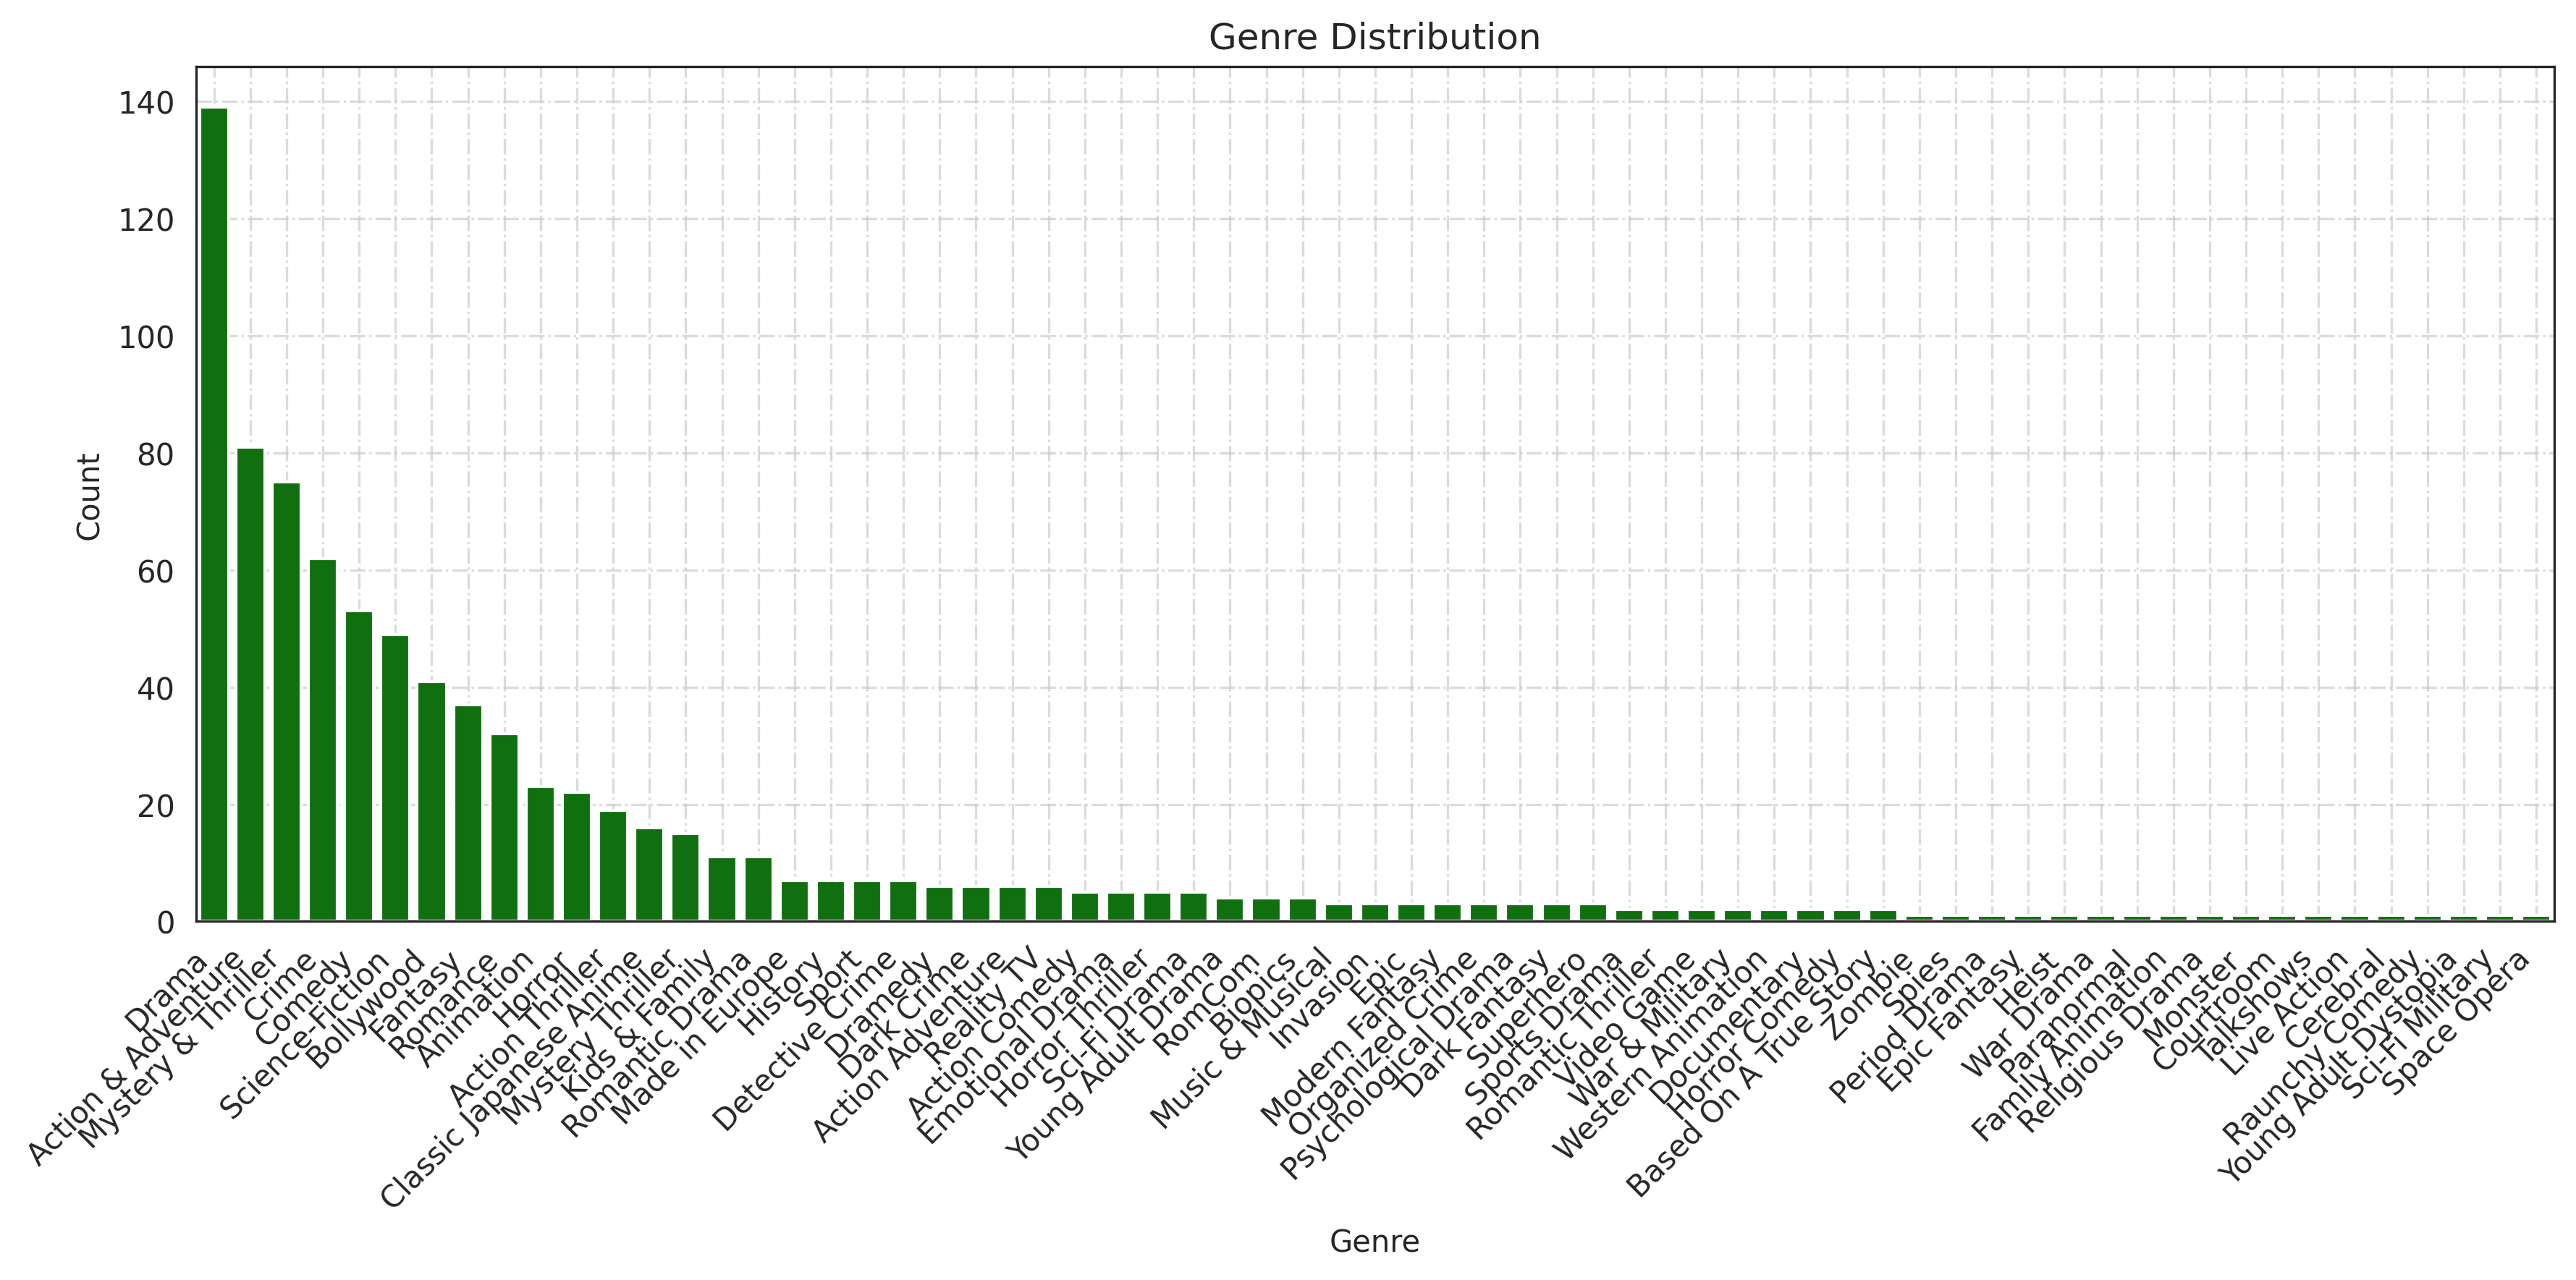

In [133]:
#Let's Visvalize it using word cloud
# Visualizing by bar plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the genre_count Series
genre_df = genre_count.reset_index()
genre_df.columns = ['Genre', 'count']

# Create bar plot
plt.figure(figsize=(12, 6), dpi=300)

# Set the style
sns.set_style("white") # style must be one of white, dark, whitegrid, darkgrid, ticks

# Plot the barplot
sns.barplot(x=genre_df['Genre'],y=genre_df["count"],color='green')

# Set labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')

# Add grid lines only on the y-axis, alpha - transparency level
plt.grid(axis='both', linestyle='dashdot', alpha=0.7) # linestyle - supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

# Rotate x-axis labels for better readability, ha - horizontal alignment of text
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

In [137]:
!pip install wordcloud

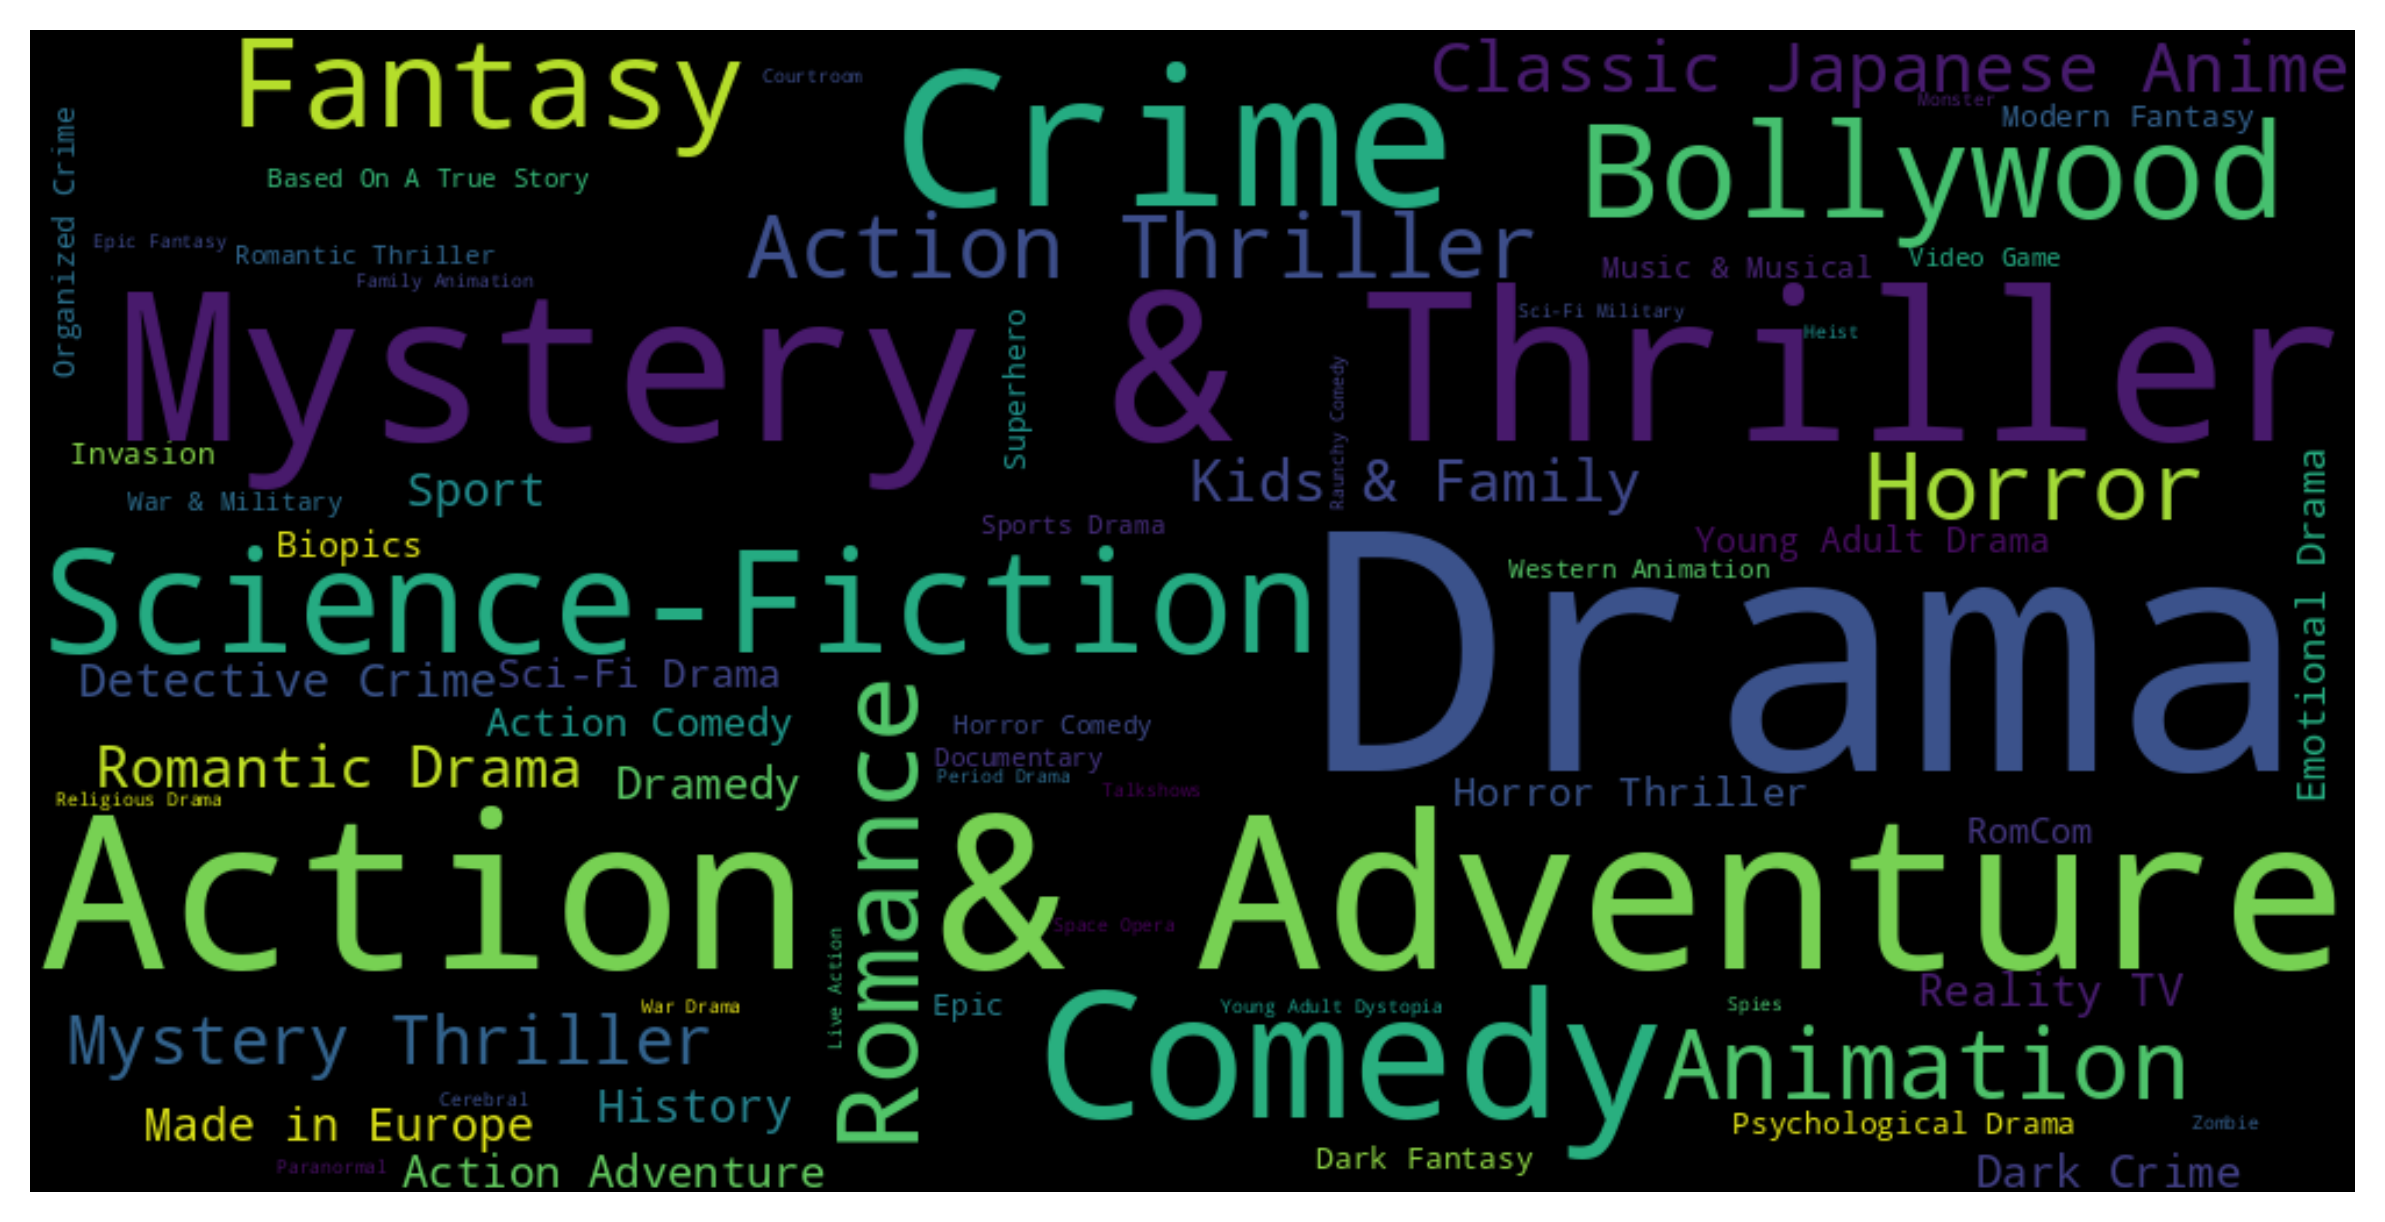

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from genre_count
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate_from_frequencies(genre_count)

plt.figure(figsize=(10, 6), dpi=300)

# interpolation -  to control how the image is rendered and 'bilinear' - to display the word cloud image smoothly
plt.imshow(wordcloud, interpolation='bilinear') # Availabe interpolation - 'antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'lanczos', 'blackman' etc
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [140]:
# Find top stream service - explode() - Extract individual genres, str.strip() - strip whitespace, and value_counts() - count occurrences.
stream_service_count = final_data_df['Streaming Provider'].explode().str.strip().value_counts()
display(stream_service_count)

,count
Streaming Provider,
JustWatchTV,101
Apple TV,18
Crunchyroll,17
Netflix,16
Amazon Prime Video,16
Bookmyshow,11
Zee5,6
Plex Player,4
JioHotstar,4


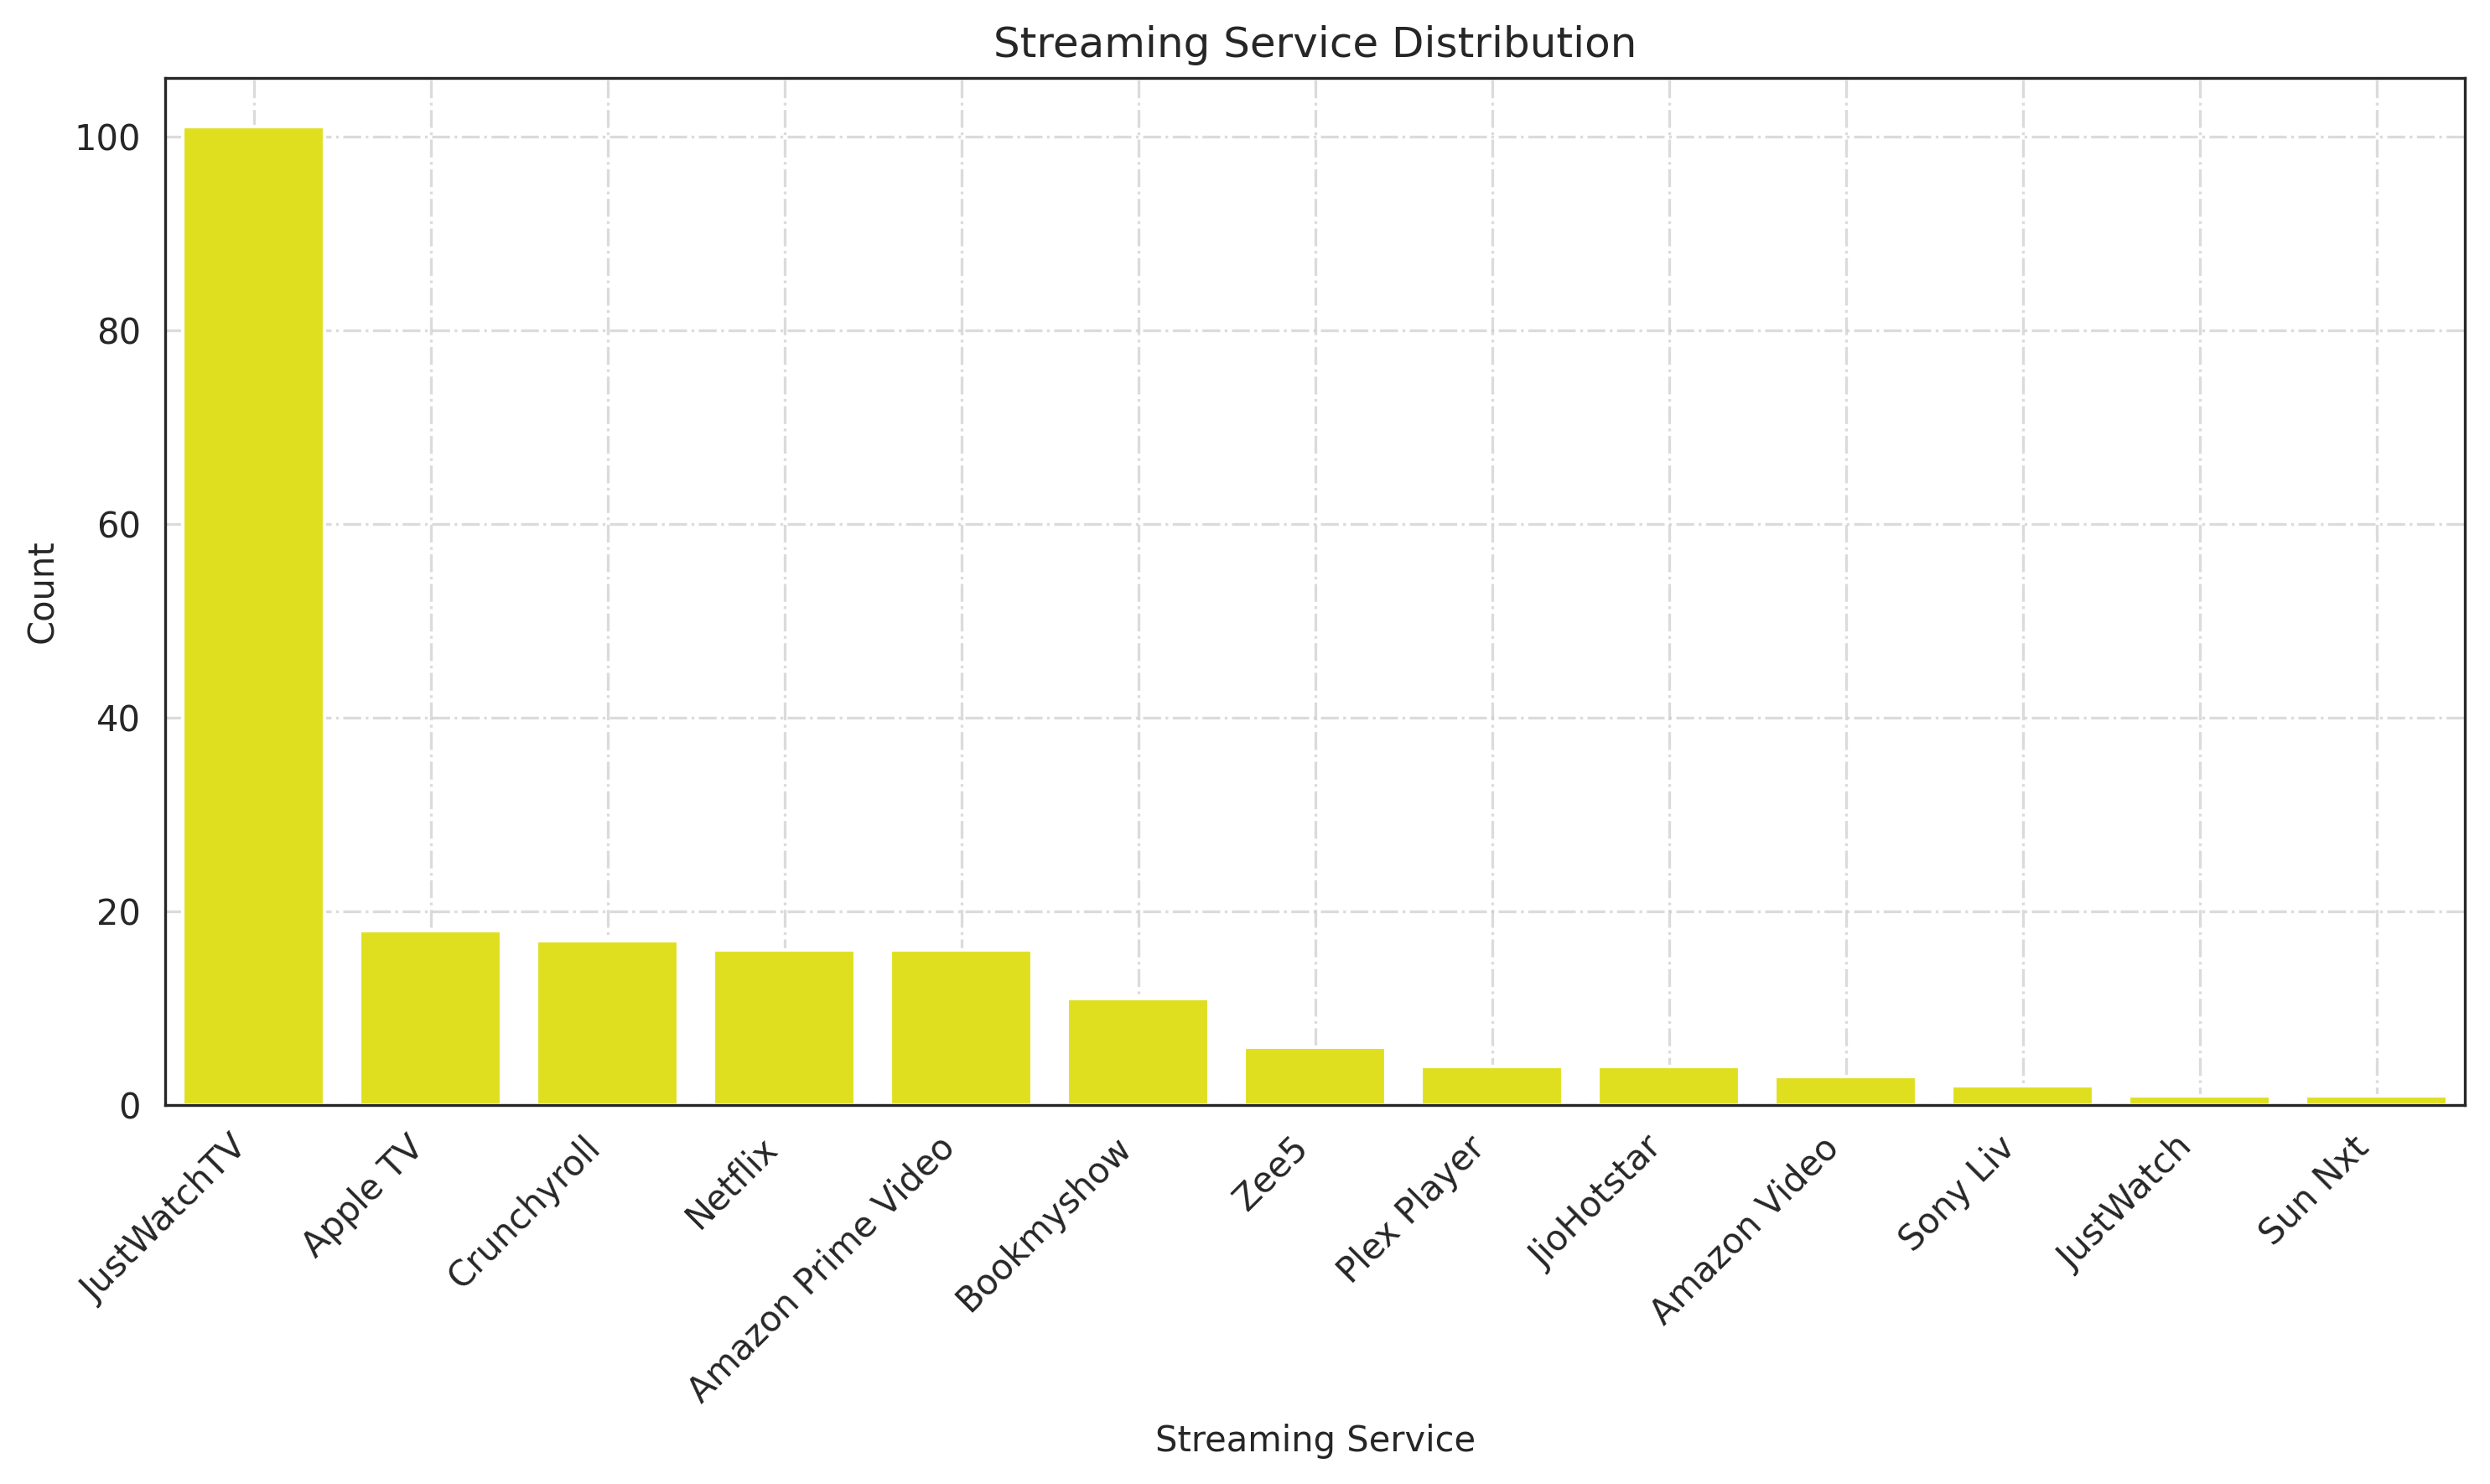

In [142]:
#Let's Visualize it using bar plot

# Create a DataFrame from the stream_service_count Series
df_stream = stream_service_count.reset_index()
df_stream.columns = ['Streaming Service', 'count']

plt.figure(figsize=(10, 6), dpi=300)

# Plot the barplot
sns.barplot(x=df_stream['Streaming Service'],y=df_stream['count'],data=df_stream,color='Yellow')

# Set the style
sns.set_style("white")

plt.xlabel('Streaming Service')
plt.ylabel('Count')
plt.title('Streaming Service Distribution')

# Add grid lines only on the y-axis, alpha - transparency level
plt.grid(axis='both', linestyle='dashdot', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

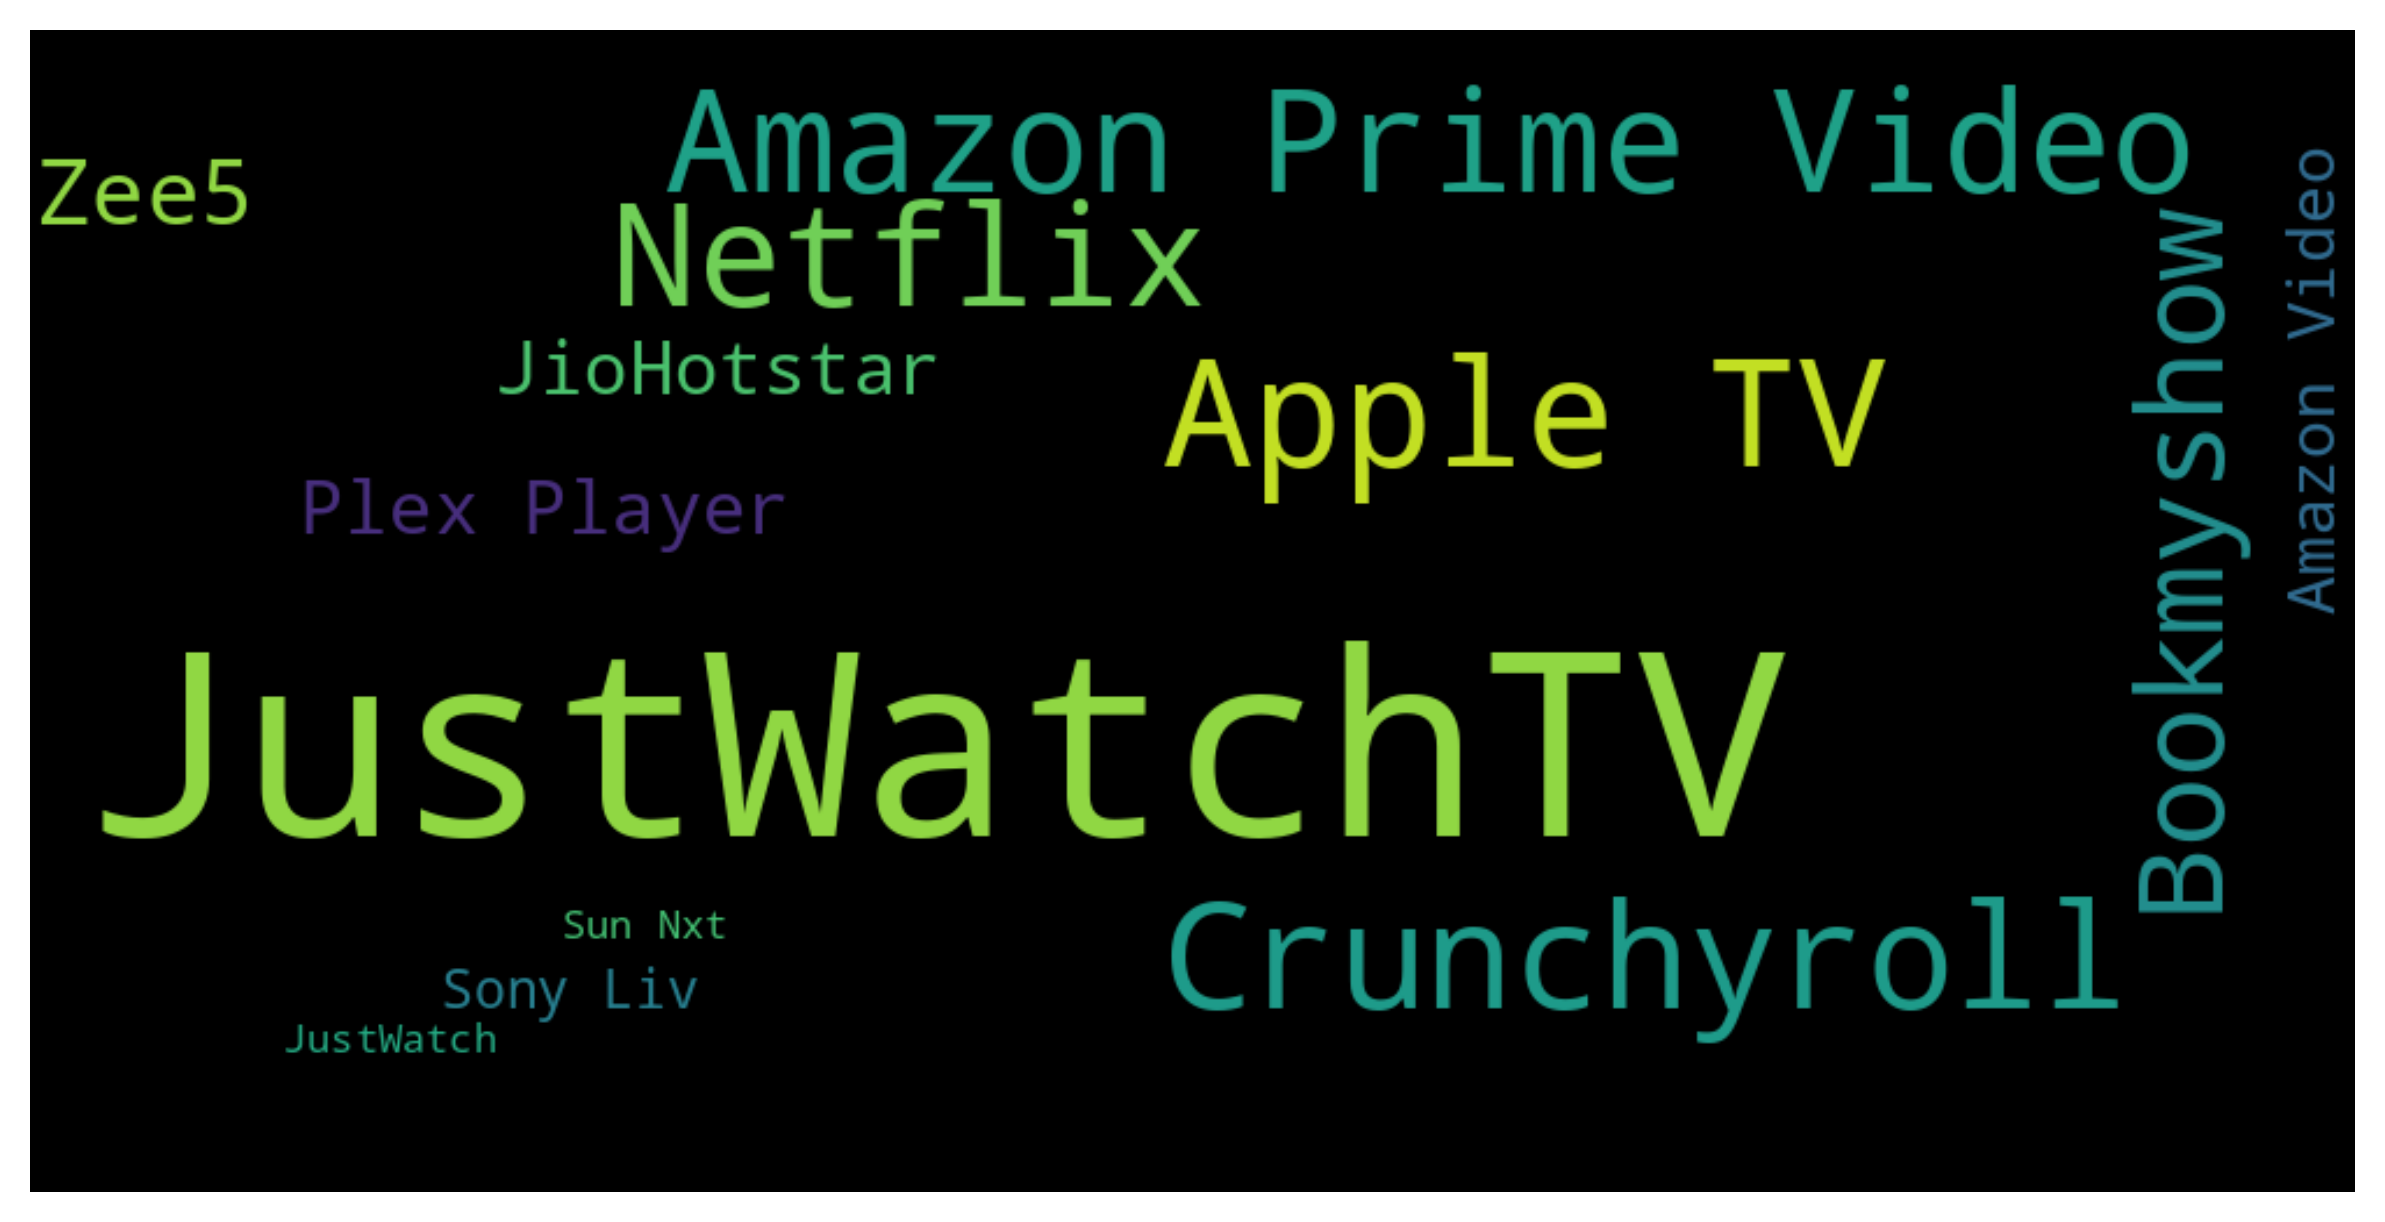

In [143]:
# #Let's Visualize it using word cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=500, background_color='black').generate_from_frequencies(stream_service_count)

plt.figure(figsize=(10, 6), dpi=300)

# interpolation = 'bilinear' - to display the word cloud image smoothly
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [144]:
#saving final dataframe as Final Data in csv format
final_data_df.to_csv("Final Data.csv")

In [147]:
#saving filter data as Filter Data in csv format
# Exporting the last 2 Year Movie and Tv Show Data as CSV file
last_2_year_df.to_csv('Last_2_Year_Movie_Tv_Show_Data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**


https://colab.research.google.com/drive/1IahBPaaXJy8QwxsIQ3dSfSx22Zf0u3wS?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***

